# Project 6 - Product Recommendations using Word2Vec - Clean the dataset

- Cleaning the dataset

- Course Name :         Applied Machine Learning
- Course instructor:    Sohail Tehranipour
- Student Name :        Afshin Masoudi Ashtiani
- Project 6 -           Product Recommendations using Word2Vec
- Date :                September 2024
- File(ipynb) :         2/3

## Step 1 : Install required libraries

In [1]:
%pip install numpy pandas matplotlib seaborn plotly

## Step 2 : Import required libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Step 3 : Load and Prepare data

In [3]:
# Load dataset
dataset_path = '/content/drive/My Drive/Applied Machine Learning/Project 6 : Product Recommendations using Word2Vec/datasets/OnlineRetail.xlsx'
# dataset_path = r'C:\Users\Afshin\Desktop\10_Projects\Project_6_Product_Recommendations_using_Word2Vec\datasets\OnlineRetail.xlsx'

df = pd.DataFrame(pd.read_excel(dataset_path))
df.info()
print(f'> Shape of the dataset is {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
> Shape of the dataset is (541909, 8)


In [4]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
413062,572306,22595,GINGHAM HEART DECORATION,12,2011-10-23 15:11:00,0.85,17841.0,United Kingdom
441445,574573,22111,SCOTTIE DOG HOT WATER BOTTLE,2,2011-11-04 16:35:00,4.95,14592.0,United Kingdom
495853,578330,84568,GIRLS ALPHABET IRON ON PATCHES,288,2011-11-24 08:28:00,0.21,17523.0,United Kingdom
368706,568991,23322,LARGE WHITE HEART OF WICKER,2,2011-09-29 16:44:00,2.95,18204.0,United Kingdom
516639,579938,23349,ROLL WRAP VINTAGE CHRISTMAS,12,2011-12-01 10:18:00,1.25,14146.0,United Kingdom


## Step 4 : Data Cleaning

- Check features and their values

In [5]:
# Returns the list of names by selected column names
boolean_col_names = df.select_dtypes(include='bool').columns.tolist()
numeric_col_names = df.select_dtypes(include='number').columns.tolist()
object_col_names = df.select_dtypes(include='object').columns.tolist()
datetime_col_names = df.select_dtypes(include='datetime').columns.tolist()
print(f'> Object   features : {object_col_names}')
print(f'> Boolean  features : {boolean_col_names}')
print(f'> Numeric  features : {numeric_col_names}')
print(f'> DateTime features : {datetime_col_names}')

> Object   features : ['InvoiceNo', 'StockCode', 'Description', 'Country']
> Boolean  features : []
> Numeric  features : ['Quantity', 'UnitPrice', 'CustomerID']
> DateTime features : ['InvoiceDate']


In [6]:
def display_feature_values(df:pd.DataFrame):
    for feature in df.columns.tolist():
        print(f'> {feature} : {df[feature].unique().tolist()}')

display_feature_values(df)

> InvoiceNo : [536365, 536366, 536367, 536368, 536369, 536370, 536371, 536372, 536373, 536374, 536375, 536376, 536377, 536378, 536380, 536381, 'C536379', 536382, 'C536383', 536384, 536385, 536386, 536387, 536388, 536389, 536390, 'C536391', 536392, 536393, 536394, 536395, 536396, 536397, 536398, 536399, 536400, 536401, 536402, 536403, 536404, 536405, 536406, 536407, 536408, 536409, 536412, 536414, 536415, 536416, 536420, 536423, 536425, 536437, 536446, 536460, 536463, 536464, 536466, 536477, 536488, 536500, 536502, 536508, 'C536506', 536514, 536520, 536521, 536522, 536523, 536524, 536525, 536526, 536527, 536528, 536529, 536530, 536531, 536532, 536533, 536534, 536535, 536536, 536537, 536538, 536539, 536540, 536541, 536542, 'C536543', 536544, 536545, 536546, 536547, 'C536548', 536549, 536550, 536551, 536552, 536553, 536554, 536555, 536556, 536557, 536558, 536559, 536560, 536561, 536562, 536563, 536564, 536565, 536566, 536567, 536568, 536569, 536570, 536571, 536572, 536573, 536574, 536575,

- Correct the datatype of **StockCode**

In [7]:
df.StockCode = df.StockCode.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- Correct the value of **Quantity**

In [8]:
len(df.Quantity.unique())

722

In [9]:
df.Quantity.unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [10]:
df.Quantity = df.Quantity.apply(lambda x: np.abs(x))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


- Handle **missing values**

In [11]:
# Visualizing missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("> Missing values per feature:")
missing_data

> Missing values per feature:


,0
Description,1454
CustomerID,135080


In [12]:
# Handle Missing Values
print(f'> Number of dataset samples before handling null values is {len(df)}')
df.dropna(ignore_index= True, inplace= True)
print(f'> Number of dataset samples after handling null values is {len(df)}')

> Number of dataset samples before handling null values is 541909
> Number of dataset samples after handling null values is 406829


- Handle **duplicates**

In [13]:
# Handle Duplicate Values
print(f'> Number of dataset samples before handling duplicates is {len(df)}')
df = df.drop_duplicates(ignore_index= True)
print(f'> Number of dataset samples after handling duplicates is {len(df)}')

> Number of dataset samples before handling duplicates is 406829
> Number of dataset samples after handling duplicates is 401604


- Handle **outliers** using **IQR**

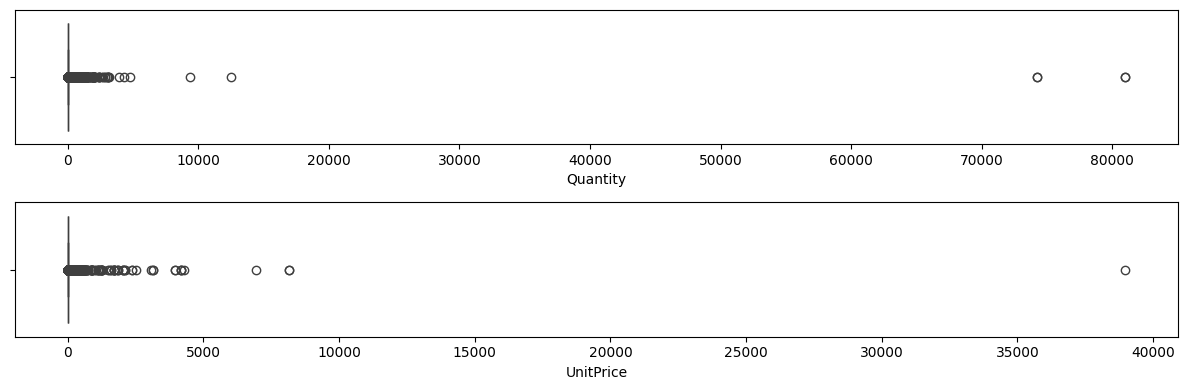

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
sns.boxplot(x=df.Quantity)
plt.subplot(2,1,2)
sns.boxplot(x=df.UnitPrice)
plt.tight_layout()
plt.show()

In [15]:
def remove_outliers_iqr(data:pd.DataFrame, column_name:str, threshold:float= 1.5) -> pd.DataFrame:
    """Remove outliers using IQR method."""
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    return data[~((data[column_name] < (Q1 - threshold * IQR)) | (data[column_name] > (Q3 + threshold * IQR)))]

In [16]:
# Example usage
print(f'> Number of samples before handling outliers is {len(df)}.')
df = remove_outliers_iqr(df, 'Quantity')
print(f'> Number of samples after handling Quantity outliers is {len(df)}.')
df = remove_outliers_iqr(df, 'UnitPrice')
print(f'> Number of samples after handling UnitPrice outliers is {len(df)}.')
df.reset_index(drop= True, inplace= True)

> Number of samples before handling outliers is 401604.
> Number of samples after handling Quantity outliers is 375447.
> Number of samples after handling UnitPrice outliers is 339928.


- Save the cleaned dataset

In [17]:
dataset_path = '/content/drive/My Drive/Applied Machine Learning/Project 6 : Product Recommendations using Word2Vec/datasets/cleaned_OnlineRetail.csv'
# dataset_path = r'C:\Users\Afshin\Desktop\10_Projects\Project_6_Product_Recommendations_using_Word2Vec\datasets\cleaned_OnlineRetail.csv'

df.to_csv(dataset_path, index= False)
print(f"> Cleaned dataset Saved to {dataset_path}")

> Cleaned dataset Saved to /content/drive/My Drive/Applied Machine Learning/Project 6 : Product Recommendations using Word2Vec/datasets/cleaned_OnlineRetail.csv
